This notebook plays with reading frames from the server (on app-engine) using Dask and calculating simple statistics. It reads every n'th frame of an individual video. The important feature is that the full set of frames is never loaded into RAM.

In [1]:
import urllib.request
from skimage import io

import dask.array as da
from dask import delayed

from matplotlib import pyplot as plt
%matplotlib inline

In [52]:
# create a list of paths to call


# hide address before committing!!!!

# base_url = 'http://**************/org/oceanobservatories/rawdata/files/RS03ASHS/PN03B/06-CAMHDA301/2016/09/01/CAMHDA301-20160901T000000Z.mov/frame/'

n = 30 # every n'th frame is read
list_urls = [base_url+str(frame) for frame in range(1,24000,n)]

In [43]:
# reading a single image to get the dimensions
image = io.imread(list_urls[0])
print(image.dtype)
print(image.shape)

uint8
(1080, 1920, 3)


In [44]:
imread =  delayed(io.imread, pure=True)
lazy_values = [imread(url) for url in list_urls]
arrays = [da.from_delayed(lazy_value, dtype=image.dtype, shape=image.shape) for lazy_value in lazy_values]
stack = da.stack(arrays, axis=0)
print(stack.shape)
print(type(stack))

(800, 1080, 1920, 3)
<class 'dask.array.core.Array'>


Calculate the mean and variance for each frame:

In [45]:
%%time
temporal_mean = stack.mean(axis = (1,2,3)).compute()

CPU times: user 2min 56s, sys: 44.7 s, total: 3min 40s
Wall time: 12min 18s


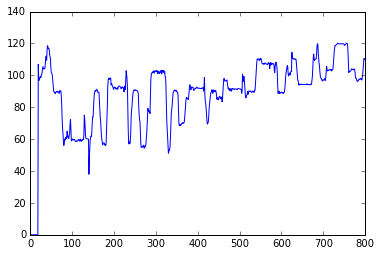

In [48]:
plt.plot(temporal_mean)

In [46]:
%%time
temporal_var = stack.var(axis = (1,2,3)).compute()

CPU times: user 3min 12s, sys: 1min 21s, total: 4min 34s
Wall time: 11min 21s


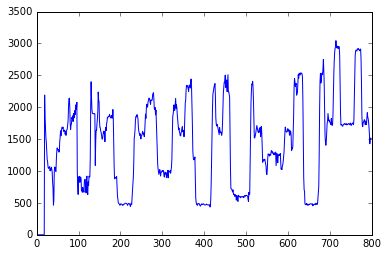

In [49]:
plt.plot(temporal_var)

Running the calculation of the mean again (to see whether the calcualtion for the second time is faster).

In [50]:
%%time
temporal_mean = stack.mean(axis = (1,2,3)).compute()

CPU times: user 2min 53s, sys: 43.5 s, total: 3min 37s
Wall time: 11min 21s


In [ ]:
The time seems to be almost the same!!!